###Generating LibriMixDataset

In [3]:
!git clone https://github.com/JorisCos/LibriMix

Cloning into 'LibriMix'...
remote: Enumerating objects: 274, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 274 (delta 71), reused 58 (delta 58), pack-reused 163
Receiving objects: 100% (274/274), 33.43 MiB | 16.15 MiB/s, done.
Resolving deltas: 100% (116/116), done.


In [4]:
%cd LibriMix

/content/LibriMix


In [5]:
!mkdir data

In [6]:
!ls

data  generate_librimix.sh  LICENSE  metadata  README.md  requirements.txt  scripts


In [7]:
!apt-get install sox libsox-fmt-all

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libao-common libao4 libid3tag0 libmad0 libopencore-amrnb0 libopencore-amrwb0 libsox-fmt-alsa
  libsox-fmt-ao libsox-fmt-base libsox-fmt-mp3 libsox-fmt-oss libsox-fmt-pulse libsox3 libwavpack1
Suggested packages:
  libaudio2 libsndio6.1
The following NEW packages will be installed:
  libao-common libao4 libid3tag0 libmad0 libopencore-amrnb0 libopencore-amrwb0 libsox-fmt-all
  libsox-fmt-alsa libsox-fmt-ao libsox-fmt-base libsox-fmt-mp3 libsox-fmt-oss libsox-fmt-pulse
  libsox3 libwavpack1 sox
0 upgraded, 16 newly installed, 0 to remove and 45 not upgraded.
Need to get 800 kB of archives.
After this operation, 2,533 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libao-common all 1.2.2+20180113-1.1ubuntu3 [6,568 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libao4 amd64 1.2.2+

In [8]:
!chmod +x /content/LibriMix/generate_librimix.sh

In [9]:
!pip install -r requirements.txt

  Preparing metadata (setup.py) ... done
  Created wheel for pysndfx: filename=pysndfx-0.3.6-py3-none-any.whl size=6539 sha256=f5f83191687820df95117036e67be5811fec220117feb4e94de55e464f4f1267
  Stored in directory: /root/.cache/pip/wheels/e8/73/04/275af1c6a789bbc12f388bce2d5353e77579e3aaadd36c61fe
Successfully built pysndfx


As the per given requirements we needed to only extract out the noise and whimp dataset, so for that we need to change these lines
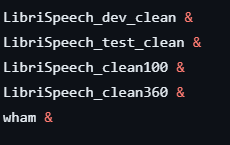

In [ ]:
!/content/LibriMix/generate_librimix.sh storage_dir

In [ ]:
!pwd

/content/LibriMix


###Loading the LibriMix dataset

In [1]:
!pip install torchmetrics speechbrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 760.1/760.1 kB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [2]:
import os
import random
from speechbrain.inference.separation import SepformerSeparation as separator
import torchaudio
import torch
from torchmetrics.audio import ScaleInvariantSignalNoiseRatio, ScaleInvariantSignalDistortionRatio

In [ ]:
!rm -r /content/LibriMix/data/*

In [ ]:
# Load dataset as a tuple (mix, s1, s2) (only paths)
def load_dataset(mix_folder, s1_folder, s2_folder):
  '''A function that returns the paths for the mix file, speech audio 1 and speech audio 2'''
  mix_files = os.listdir(mix_folder)
  dataset = [(os.path.join(mix_folder, mix_file),
              os.path.join(s1_folder, mix_file),
              os.path.join(s2_folder, mix_file))
              for mix_file in mix_files]
  return dataset

In [ ]:
# Perform 70:30 split
def train_test_split(dataset, split_ratio=0.7):
    random.seed(42)
    random.shuffle(dataset)
    split_idx = int(len(dataset) * split_ratio)#splitting into the split ratio
    train_set = dataset[:split_idx]
    test_set = dataset[split_idx:]
    return train_set, test_set

In [ ]:
# Load the dataset
mix_folder = "/content/LibriMix/data/Libri2Mix/wav16k/min/test/mix_both"
s1_folder = "/content/LibriMix/data/Libri2Mix/wav16k/min/test/s1"
s2_folder = "/content/LibriMix/data/Libri2Mix/wav16k/min/test/s2"
dataset = load_dataset(mix_folder, s1_folder, s2_folder)

# Split the dataset
train_set, test_set = train_test_split(dataset, split_ratio=0.7)

In [ ]:
print('Loaded the LibriMix dataset successfully, and have performed 70:30 split')

Loaded the LibriMix dataset successfully, and have performed 70:30 split


###Evaluate performance using SepFormer Model

Loading the Sepformer from huggingface

In [ ]:
# Load the model
model = separator.from_hparams(source="speechbrain/sepformer-whamr", savedir='pretrained_models/sepformer-whamr', run_opts={"device":"cuda"})

hyperparams.yaml:   0%|          | 0.00/1.51k [00:00<?, ?B/s]

masknet.ckpt:   0%|          | 0.00/113M [00:00<?, ?B/s]

encoder.ckpt:   0%|          | 0.00/17.3k [00:00<?, ?B/s]

decoder.ckpt:   0%|          | 0.00/17.3k [00:00<?, ?B/s]

In [ ]:
# Perform inference using the provided script
def perform_inference(model, test_set):
    si_snr_metric = ScaleInvariantSignalNoiseRatio()
    si_sdr_metric = ScaleInvariantSignalDistortionRatio()
    si_snr_values = []
    si_sdr_values = []
    for mix_path, s1_path, s2_path in test_set:
        est_sources = model.separate_file(path=mix_path)
        s1, _ = torchaudio.load(s1_path)
        s2, _ = torchaudio.load(s2_path)

        # Calculate SI-SNR and SI-SDR for original sources
        original_sources = torch.stack((s1, s2))
        si_snr_orig = si_snr_metric(original_sources, original_sources)
        si_sdr_orig = si_sdr_metric(original_sources, original_sources)

        # Calculate SI-SNR and SI-SDR for estimated sources
        si_snr_est = si_snr_metric(est_sources, original_sources)
        si_sdr_est = si_sdr_metric(est_sources, original_sources)

        # Calculate SI-SNR and SI-SDR improvement
        si_snr_improvement = si_snr_est - si_snr_orig
        si_sdr_improvement = si_sdr_est - si_sdr_orig

        # Append metric values to lists
        si_snr_values.append(si_snr_improvement.item())
        si_sdr_values.append(si_sdr_improvement.item())

    # Calculate average values
    avg_si_snr = sum(si_snr_values) / len(si_snr_values)
    avg_si_sdr = sum(si_sdr_values) / len(si_sdr_values)

    # Log average values
    print(f"Average SI-SNR Improvement: {avg_si_snr}")
    print(f"Average SI-SDR Improvement: {avg_si_sdr}")

    # Optionally, you can also return the average values if needed
    return avg_si_snr, avg_si_sdr


In [ ]:
# Perform inference on the test set and calculate metrics
avg_si_snri, avg_si_sdri = perform_inference(model, test_set)

In [ ]:
print(avg_si_snri)

10.2


In [ ]:
print(avg_si_sdri)

9.7


#Fine tune the SepFormer on train split

In [ ]:
%cd ..
!git clone https://github.com/speechbrain/speechbrain/

/content
Cloning into 'speechbrain'...
remote: Enumerating objects: 79127, done.
remote: Counting objects: 100% (1898/1898), done.
remote: Compressing objects: 100% (1171/1171), done.
remote: Total 79127 (delta 910), reused 1326 (delta 657), pack-reused 77229
Receiving objects: 100% (79127/79127), 87.00 MiB | 26.44 MiB/s, done.
Resolving deltas: 100% (52638/52638), done.


In [ ]:
%cd speechbrain
!pip install -r requirements.txt
!pip install -e .

In [ ]:
%cd  recipes/WHAMandWHAMR/separation
!python train.py hparams/sepformer-whamr.yaml --data_folder=data --rir_path=output_data

## Evaluate performance of fine-tuned model on test split



In [ ]:
!python train.py hparams/sepformer-wham.yaml --data_folder data --test_only